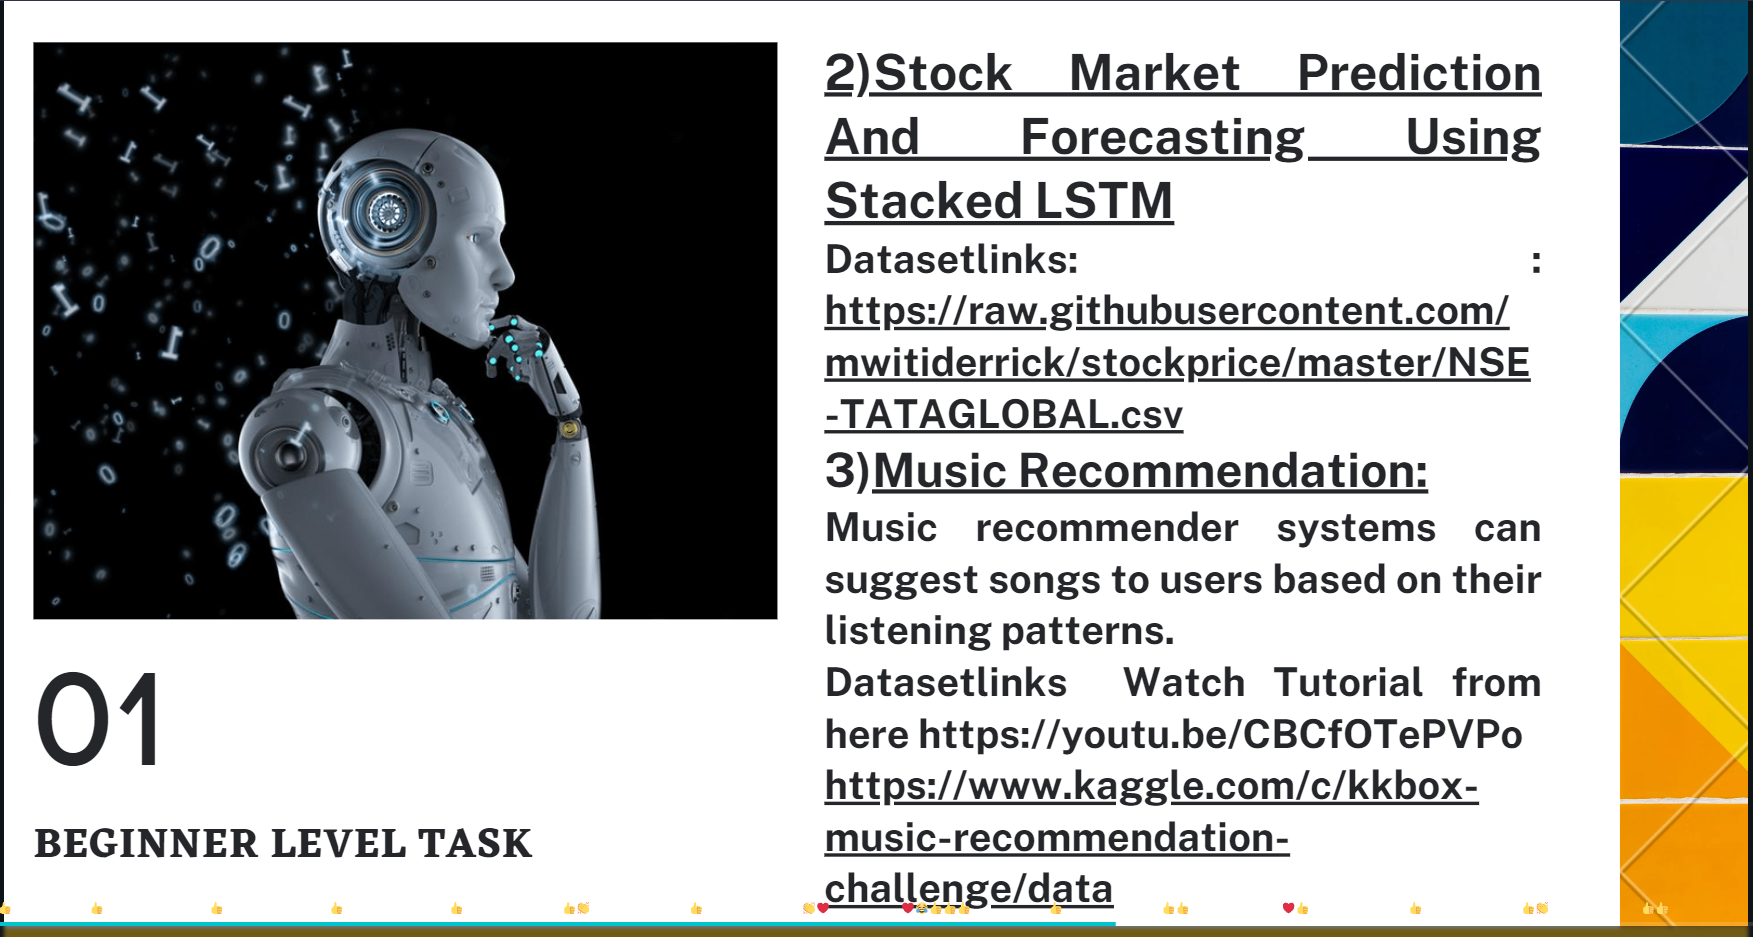

Task-2: Stock Market Prediction And Forecasting Using Stacked LSTM :

Dataset: https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Name: Abhishek Kumar

1. Importing Required Libraries and Packages

In [7]:
import numpy as np
import pandas as pd
import tensorflow as ft
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

2. Importing the Dataset

In [8]:
Dataset_link='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [9]:
df= pd.read_csv(Dataset_link, parse_dates=True,)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [10]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
145,2018-02-27,275.00,279.70,273.10,275.40,275.00,4778178,13208.65
1786,2011-07-14,100.50,103.95,100.05,102.40,102.55,788661,811.17
259,2017-09-13,214.65,214.95,206.20,208.80,207.30,4637092,9768.64
1865,2011-03-22,98.25,99.70,97.50,97.70,97.90,1111602,1095.86
1439,2012-12-05,166.45,168.25,165.10,165.60,165.60,2272058,3787.28
1186,2013-12-10,146.75,149.00,146.70,147.60,147.45,1821331,2689.55
866,2015-03-31,150.25,151.20,148.30,148.85,148.80,1383972,2073.89
1610,2012-03-29,109.00,110.55,106.25,108.00,108.30,3130838,3391.20
1493,2012-09-13,134.35,135.65,132.50,134.00,133.90,2158447,2889.20
1815,2011-06-03,94.00,97.00,93.20,93.70,93.60,1195286,1136.30


In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [12]:
df.shape

(2035, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [14]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [15]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


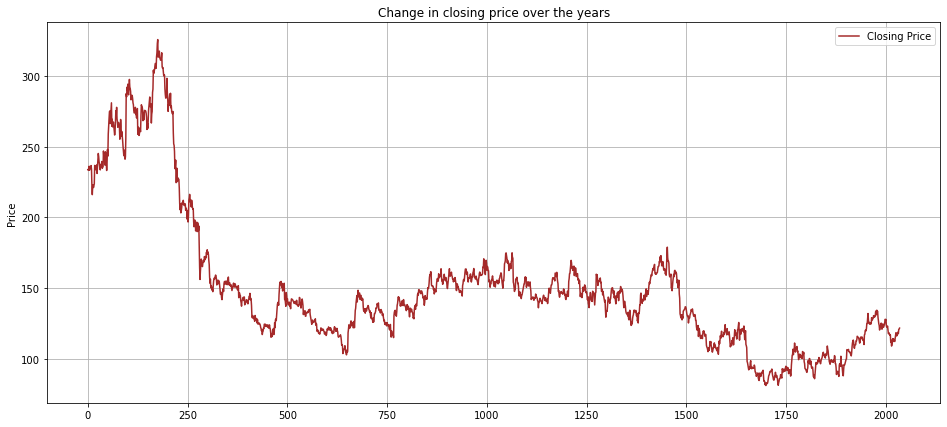

In [22]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color= 'brown',label="Closing Price")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

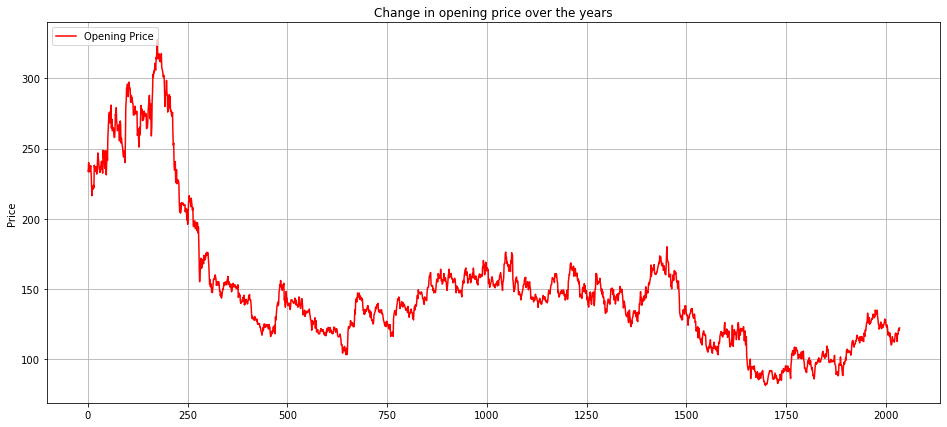

In [18]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='red',label="Opening Price")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

In [23]:
df1=df.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<AxesSubplot:>

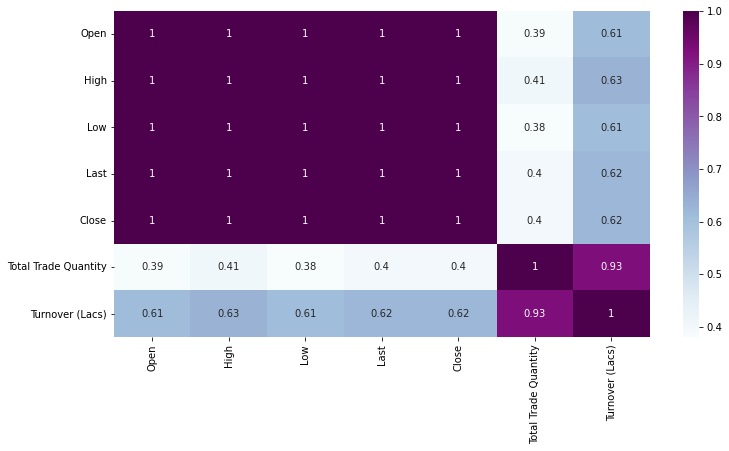

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

<AxesSubplot:ylabel='Turnover (Lacs)'>

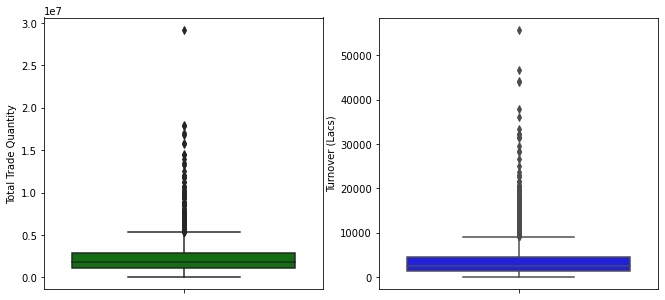

In [26]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='green')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='blue')

In [27]:
training_set= df[['Open']]
training_set=pd.DataFrame(training_set)
training_set

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [28]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(df),:1]

In [31]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)

In [33]:
print(x_train.shape,y_train.shape)

(1221, 100) (1221,)


In [34]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [35]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 75, batch_size = 64, verbose = 1)

Epoch 1/75
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/20 [===========================>..] - ETA: 0s - loss: 0.0246 - acc: 8.2237e-04WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002B45E325EE0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set t

In [38]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x000002B466070CA0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x000002B466070CA0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
20/20 [==============================] - 0s 21ms/step


In [39]:
math.sqrt(mean_squared_error(y_train,train_predict1))

167.26086118493197

In [40]:
math.sqrt(mean_squared_error(y_test,test_predict1))

117.13643835276453

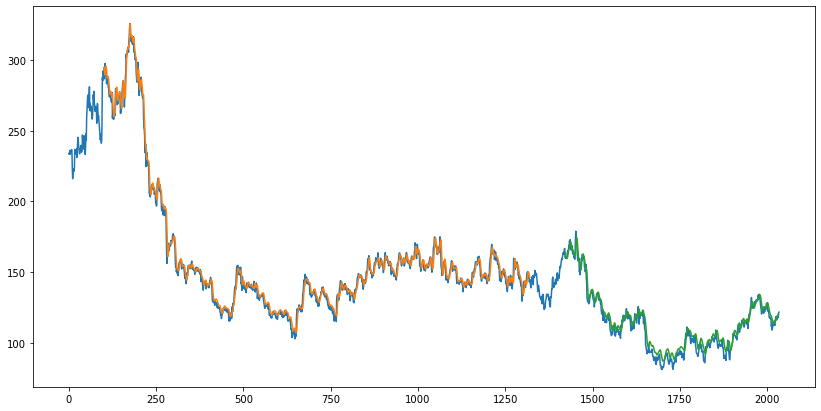

In [41]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1
# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1
# plot baseline and predictions
plt.figure(figsize=(14,7))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)